Packages

In [24]:
from os import listdir
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import numpy as np
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

Data preparation

In [7]:
# Look at data folder structure
classes_dir = listdir("data/Kather_texture_2016_image_tiles_5000")
classes_dir

['.DS_Store',
 '01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

In [8]:
# Check files
files = listdir("data/Kather_texture_2016_image_tiles_5000/01_TUMOR")
for n in range(5):
    print(files[n])

10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif
10062_CRC-Prim-HE-02_003b.tif_Row_1_Col_301.tif
100B0_CRC-Prim-HE-09_009.tif_Row_1_Col_301.tif
10104_CRC-Prim-HE-10_021.tif_Row_451_Col_1.tif
10142_CRC-Prim-HE-09_025.tif_Row_151_Col_151.tif


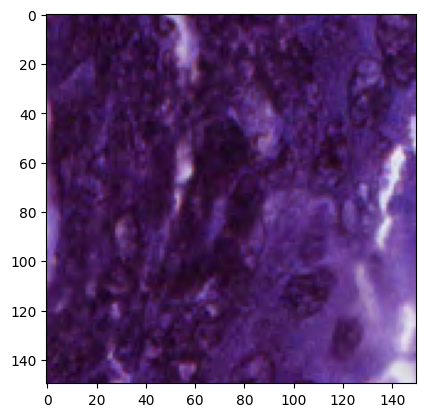

In [20]:
# visualize example image
file = cv2.imread("data/Kather_texture_2016_image_tiles_5000/01_TUMOR/1A11_CRC-Prim-HE-07_022.tif_Row_601_Col_151.tif")
# file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
# file = cv2.resize(file, (128, 128))
plt.imshow(file)

In [36]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images("data/Kather_texture_2016_image_tiles_5000"))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # Since we are going to use MobileNetV2 we need to resize the images
    # to the expected size by the pre-trained network.
    image = load_img(imagePath, target_size=(150, 150))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


In [37]:
data.shape

(5000, 150, 150, 3)

In [48]:
print(labels[10], labels[2500], labels[4500])

01_TUMOR 05_DEBRIS 08_EMPTY
